In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [6]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [9]:
X = iris['data'][:, [2, 3]]
y = iris.target
print(X.shape,y.shape)

(150, 2) (150,)


In [43]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, stratify=y)
print(X_train.shape,X_test.shape,y_train.shape)
X_train[0]

(105, 2) (45, 2) (105,)


array([4.5, 1.6])

In [44]:
print(np.bincount(y));print(np.bincount(y_train));print(np.bincount(y_test))

[50 50 50]
[35 35 35]
[15 15 15]


In [47]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [48]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

ppn = Perceptron(max_iter=45, eta0=0.01)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.01, max_iter=45)

In [55]:
y_pred = ppn.predict(X_test_std)
print(f"accuracy:{accuracy_score(y_test,y_pred):.2f}")
print(f"accuracy:{ppn.score(X_test_std,y_test):.2f}")

accuracy:0.89
accuracy:0.89


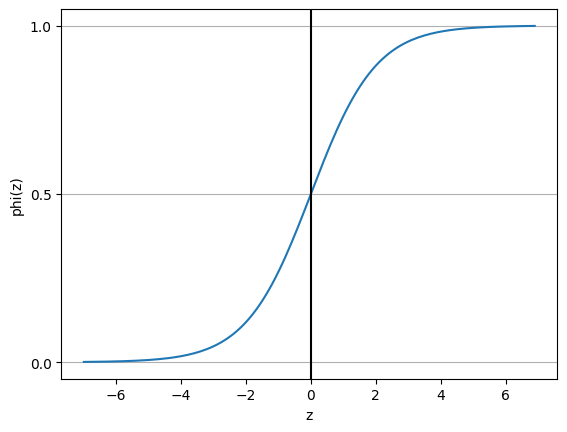

In [62]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.xlabel('z')
plt.ylabel('phi(z)')
plt.yticks([0.0, 0.5, 1]);
plt.axvline(0.0, color='k');
ax = plt.gca()
ax.yaxis.grid(True)
plt.show()

In [68]:
class LogisticRegressionGD:
    def __init__(self, niter=10, eta=0.1):
        self.eta = eta
        self.niter = niter
    
    def fit(self, X, y):
        self.w_ = np.random.normal(loc=0.0, scale=1.0, size=X.shape[1]+1)
        self.costs_ = []
        for _ in range(self.niter):
            output = self.act_fn(self.net_input(X))
            diff = y - output
            self.w_[1:] += self.eta * X.T.dot(diff)
            self.w_[0] += self.eta * diff.sum()
            cost = (-y.dot(np.log(output)))-((1-y).dot(np.log(1-output)))
                                 
    def act_fn(self, x):
        return (1.0/(np.exp(-np.clip(x, -250, 250))))
    
    def net_input(self, x):
        return X.dot(self.w_[1:]) + self.w_[0]
    
    def predict(self, x):
        return np.where(self.net_input(x) >=0.0, 1, -1)
            